# Mini Project 2–ConsumerComplaintResolutionAnalysisUsing Python

###Scenario: 
Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product.We can understand their mindset toward our service without asking each customer. When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.So Here, I will analyze data, and with the help of different algorithms, I are finding the best classification of customer category that we can predict our test data.

###Objective: 
Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, andbased on the best model,make a prediction for the test file and save the output.The mainobjective is to predict whetherour customer is disputedor not with the help ofgiven data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import wordpunct_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Read the Data from the Given excel file.
train = pd.read_csv("/content/drive/MyDrive/Machine Learning/Edureka/Mini Project 2 ConsumerComplaintResolutionAnalysisUsing Python/Consumer_Complaints_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine Learning/Edureka/Mini Project 2 ConsumerComplaintResolutionAnalysisUsing Python/Consumer_Complaints_test.csv")

In [ ]:
applyx = test.copy()

##Data Cleaning

In [ ]:
# Check the data type for both data (test file and train file)
train.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [ ]:
test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

In [ ]:
train.shape

(358810, 18)

In [ ]:
# Do missing value analysis and dropcolumns where more than 25% of data are missing
a = pd.DataFrame((train.isnull().sum()), columns=["Missing Count"])
a["Missing %"]=round((train.isnull().sum())/358810*100)
print(a)
train.drop(columns=["Sub-product", "Sub-issue", "Consumer complaint narrative", "Company public response", "Tags", "Consumer consent provided?"], inplace=True)
test.drop(columns=["Sub-product", "Sub-issue", "Consumer complaint narrative", "Company public response", "Tags", "Consumer consent provided?"], inplace=True)

                              Missing Count  Missing %
Date received                             0        0.0
Product                                   0        0.0
Sub-product                          103786       29.0
Issue                                     0        0.0
Sub-issue                            219374       61.0
Consumer complaint narrative         302630       84.0
Company public response              290879       81.0
Company                                   0        0.0
State                                  2903        1.0
ZIP code                               2911        1.0
Tags                                 308584       86.0
Consumer consent provided?           257230       72.0
Submitted via                             0        0.0
Date sent to company                      0        0.0
Company response to consumer              0        0.0
Timely response?                          0        0.0
Consumer disputed?                        0        0.0
Complaint 

In [ ]:
# Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”
train["Date received"] = pd.to_datetime(train["Date received"])
train["Date sent to company"] = pd.to_datetime(train["Date sent to company"])
test["Date received"] = pd.to_datetime(test["Date received"])
test["Date sent to company"] = pd.to_datetime(test["Date sent to company"])

train["Days held"] = train["Date sent to company"] - train["Date received"]
test["Days held"] = test["Date sent to company"] - test["Date received"]

train["Days held"] =[x.days for x in train["Days held"]]
test["Days held"] =[x.days for x in test["Days held"]]

In [ ]:
# Extracting Day, Month,and Year from Date Received Column and create new fields for a month, year,and day
year = []
month = []
day = []
for x in train["Date received"]:
  year.append(x.year)
  month.append(x.month)
  day.append(x.day)

train["Year"]=year
train["Month"]=month
train["Day"]=day


year = []
month = []
day = []
for x in test["Date received"]:
  year.append(x.year)
  month.append(x.month)
  day.append(x.day)

test["Year"]=year
test["Month"]=month
test["Day"]=day

In [ ]:
# Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"fields
train.drop(columns=["Date received", "Date sent to company", "ZIP code", "Complaint ID"], inplace=True)
test.drop(columns=["Date received", "Date sent to company", "ZIP code", "Complaint ID"], inplace=True)

In [ ]:
train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Days held,Year,Month,Day
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,0,2015,10,14
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,0,2015,4,26
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,14,2013,12,20
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,1,2016,3,3
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,0,2015,1,30


In [ ]:
# Imputing Nullvalue in “State”by Mode
train["State"]=train["State"].fillna(value=train["State"].mode()[0])
test["State"]=test["State"].fillna(value=test["State"].mode()[0])
test["State"].isnull().sum()

0

In [ ]:
# with the help of the days we calculated above,create a new field 'Week_Received'where we calculate the week based on the day of receiving.
def dats_to_week(x):
  Week_Received=[]
  for i in x["Day"]:
    if i == 0:
      Week_Received.append(0)
    elif i <= 7:
      Week_Received.append(1)
    elif i > 7 and i <= 14:
      Week_Received.append(2)
    elif i > 14 and i <= 21:
      Week_Received.append(3)
    elif i > 21 and i <= 28:
      Week_Received.append(4)
    else:
      Week_Received.append(5)
  return Week_Received

train["Week_Received"] = dats_to_week(train)
test["Week_Received"] = dats_to_week(test)

##Data Visualization

In [ ]:
# store data of disputed people into the “disputed_cons” variable for future tasks
disputed_cons = train[train["Consumer disputed?"] == "Yes"]

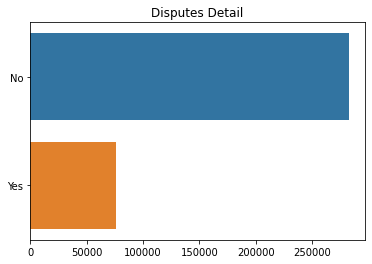

In [ ]:
# Plot bar graph of the total no of disputes of consumers with the help of seaborn
plt.title("Disputes Detail")
sns.barplot(x=train["Consumer disputed?"].value_counts().values, y=["No", "Yes"])
plt.show()

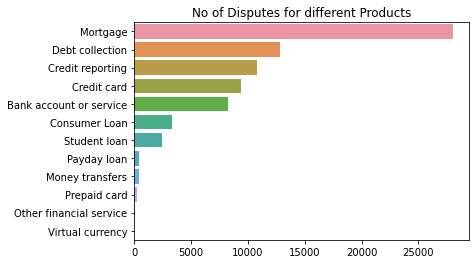

In [ ]:
# Plot bar graph of the total no of disputes products-wise with the help of seaborn
plt.title("No of Disputes for different Products")
sns.barplot(x=disputed_cons["Product"].value_counts().values, y=disputed_cons["Product"].value_counts().index)
plt.show()

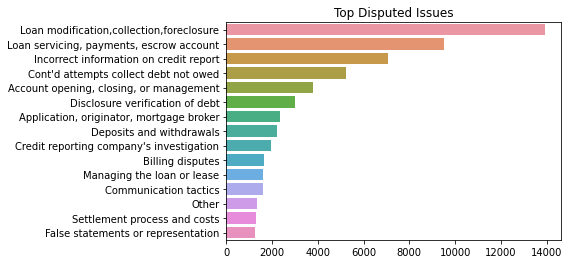

In [ ]:
# Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help ofseaborn
plt.title("Top Disputed Issues")
sns.barplot(x=disputed_cons["Issue"].value_counts().values[:15], y=disputed_cons["Issue"].value_counts().index[:15])
plt.show()

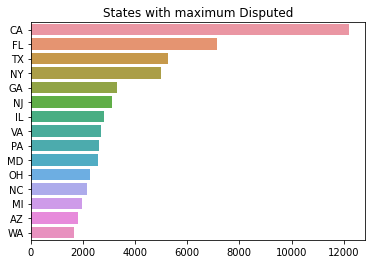

In [ ]:
# Plot bar graph of the total no of disputes by State with Maximum Disputes
plt.title("States with maximum Disputed")
sns.barplot(x=disputed_cons["State"].value_counts().values[:15], y=disputed_cons["State"].value_counts().index[:15])
plt.show()

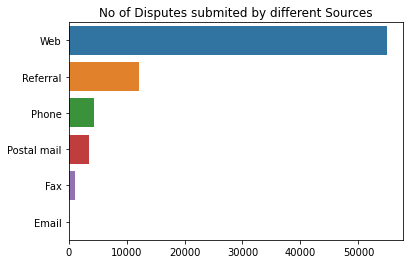

In [ ]:
# Plot bar graph of the total no of disputes Submitted Via different source
plt.title("No of Disputes submited by different Sources")
sns.barplot(x=disputed_cons["Submitted via"].value_counts().values, y=disputed_cons["Submitted via"].value_counts().index)
plt.show()

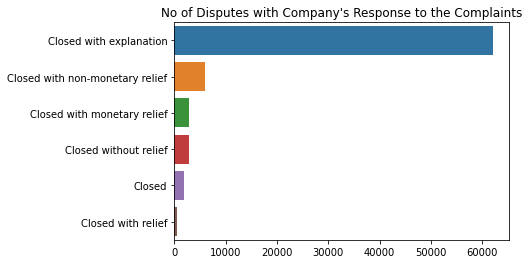

In [ ]:
# Plot bar graph of the total no of disputes where the Company's Response to the Complaints
plt.title("No of Disputes with Company's Response to the Complaints")
sns.barplot(x=disputed_cons["Company response to consumer"].value_counts().values, y=disputed_cons["Company response to consumer"].value_counts().index)
plt.show()

In [ ]:
# Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

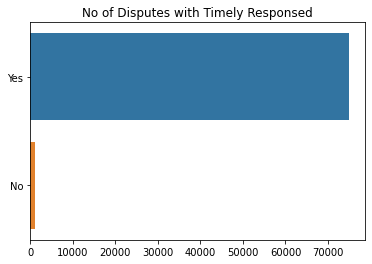

In [ ]:
# Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response
plt.title("No of Disputes with Timely Responsed")
sns.barplot(x=disputed_cons["Timely response?"].value_counts().values, y=disputed_cons["Timely response?"].value_counts().index)
plt.show()

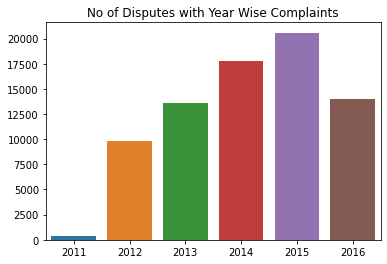

In [ ]:
# Plot bar graph of the total no of disputes over Year Wise Complaints
plt.title("No of Disputes with Year Wise Complaints")
sns.barplot(y=disputed_cons["Year"].value_counts().values, x=disputed_cons["Year"].value_counts().index)
plt.show()

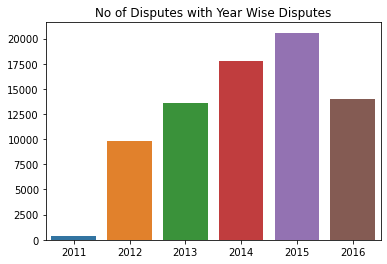

In [ ]:
# Plot bar graph of the total no of disputes over Year Wise Disputes
plt.title("No of Disputes with Year Wise Disputes")
sns.barplot(y=disputed_cons["Year"].value_counts().values, x=disputed_cons["Year"].value_counts().index)
plt.show()

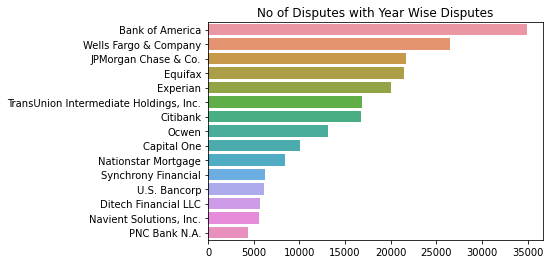

In [ ]:
# Plot bar graph of Top Companies with Highest Complaints
plt.title("No of Disputes with Year Wise Disputes")
sns.barplot(x=train["Company"].value_counts().values[:15], y=train["Company"].value_counts().index[:15])
plt.show()

##Data Processing

In [ ]:
# Converte all negative days held to zero(it is the time taken by the authority that can't be negative)
train["Days held"] = [0 if x<1 else x for x in train["Days held"]]
test["Days held"] = [0 if x<1 else x for x in test["Days held"]]

In [ ]:
# Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'
train.drop(columns=['Company', 'State', 'Year'], inplace=True)
test.drop(columns=['Company', 'State', 'Year'], inplace=True)

In [ ]:
# Processing Issue data using NLP
relevant_text_train = train['Issue']
relevant_text_test = test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
# Processing Issue data using NLP
train['Issues_cleaned'] = clean_data_train
test['Issues_cleaned'] = clean_data_test
train = train.drop('Issue', axis = 1)
test = test.drop('Issue', axis = 1)

In [ ]:
# Processing Issue data using NLP
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
#weights.head()

In [ ]:
# Processing Issue data using NLP
train = train.drop('Issues_cleaned', axis = 1)
test = test.drop('Issues_cleaned', axis = 1)
train = pd.concat([train, issues_train], axis = 1)
test = pd.concat([test, issues_test], axis = 1)
Feature168 = [0] * 119606
test['Feature168'] = Feature168

In [ ]:
# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
le = LabelEncoder()
le.fit(train["Consumer disputed?"])
train["Consumer disputed?"] = le.transform(train["Consumer disputed?"])

In [ ]:
# Create Dummy Variables for categorical features and concat with the original data frame like: 'Product,’'Submitted via,’ 
#'Company response to consumer,’'Timely response?'
d = pd.get_dummies(data=train.get(["Product", "Submitted via", "Company response to consumer", "Timely response?"]), drop_first=True)
train.drop(columns=["Product", "Submitted via", "Company response to consumer", "Timely response?", "Day"], inplace=True)
train = train.join(d)

d = pd.get_dummies(data=test.get(["Product", "Submitted via", "Company response to consumer", "Timely response?"]), drop_first=True)
test.drop(columns=["Product", "Submitted via", "Company response to consumer", "Timely response?", "Day"], inplace=True)
test = test.join(d)

In [ ]:
# Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)
X = train.drop(columns="Consumer disputed?")
Y = train["Consumer disputed?"]

Y=Y.to_numpy().reshape((-1,1))

In [ ]:
# Scaling the Data Sets (note:discard dependent variable before doing standardization)and 
#Make feature Selection with the help of PCA up to 80% of the information.
slx = StandardScaler()

slx.fit(X)
X = slx.transform(X)

apply_x = slx.transform(test)

In [ ]:
pca = PCA(n_components=55)
pca.fit(X)
X = pca.transform(X)

apply_x = pca.transform(apply_x)

pca.explained_variance_ratio_.sum()

0.8129772362840322

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

## Model Building

In [ ]:
# Build LogisticRegression model
LR = LogisticRegression(random_state=10, solver="newton-cg", C=0.02)
LR.fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test)) #7889, 7889

0.7889412223739584

In [ ]:
# # Build DecisionTreeClassifier model
# DT = DecisionTreeClassifier(random_state=10)
# DT.fit(X_train, y_train)
# accuracy_score(y_test, DT.predict(X_test)) #7509, 7365

In [ ]:
# # Build RandomForestClassifier model
# RF = RandomForestClassifier(random_state=10)
# RF.fit(X_train, y_train)
# accuracy_score(y_test, RF.predict(X_test)) #7609, 7520

In [ ]:
# # Build AdaBoostClassifier model
# ABC = AdaBoostClassifier(base_estimator=LR, random_state=10)
# ABC.fit(X, Y)
# accuracy_score(y_test, ABC.predict(X_test)) #7889, 7889

In [ ]:
# # Build GradientBoostingClassifier model
# GBC = GradientBoostingClassifier(random_state=10)
# GBC.fit(X, Y)
# accuracy_score(y_test, GBC.predict(X_test))#7889, 7889

In [ ]:
# # Build KNeighborsClassifier model
# KNN = KNeighborsClassifier()
# KNN.fit(X_train, y_train)
# accuracy_score(y_test, KNN.predict(X_test)) #7499, 7512

In [ ]:
# # Build XGBClassifier model
# XGB = XGBClassifier(random_state=10,booster="dart", learning_rate=0.005, gamma=0.1, max_depth=2, reg_lambda=1)
# XGB.fit(X_train, y_train,
#         early_stopping_rounds=10,
#         eval_metric="aucpr",
#         eval_set=[(X_test, y_test)],
#         verbose=False)
# accuracy_score(y_test, XGB.predict(X_test)) #7889, 7889

In [ ]:
# # Whoever gives the most accurate result uses it and predicts the outcome for the test file and 
# #fills its dispute column so the business team can take some action accordingly.
LR = LogisticRegression(random_state=10, solver="newton-cg", C=0.02)
LR.fit(X_train, y_train)
y_pred = LR.predict(apply_x)

In [ ]:
applyx["Consumer disputed?"] = y_pred
applyx.to_csv("Test_X_Y.csv")
applyx.head()

##Cross validation and Hyperparameter tuning are done below

In [ ]:
# #LogisticRegression
# #penalty=[]
# solver=["newton-cg", "saga", "lbfgs", "liblinear", "sag"]
# C=[0.002,1]

# #DecisionTreeClassifier
# criterion=['gini', 'entropy']
# min_samples_split=[2,4,6,8]
# splitter=['best', 'random'] ,DT,RF

# base_estimator=[LR]
# learning_rate=[0.5,1.5]
# algorithm=['SAMME', 'SAMME.R']

#learning_rate=[0.01]#, 0.001
#booster=["gbtree", "gblinear", "dart"]
#gamma=[0.1,0.5,1]
#max_depth=[2,4,6]
#reg_lambda=[1,0.5,0.05]


# # define grid search
# grid = dict(reg_lambda=reg_lambda)#,, , max_depth=max_depth, reg_lambda=reg_lambdalearning_rate=learning_ratebooster=booster
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
# grid_search = GridSearchCV(estimator=XGB, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# #LogisticRegression
# #penalty=[]
# solver=["newton-cg", "saga", "lbfgs", "liblinear", "sag"]
# C=[0.002,1]

# #DecisionTreeClassifier
# criterion=['gini', 'entropy']
# min_samples_split=[2,4,6,8]
# splitter=['best', 'random'] ,DT,RF

# #ABC
# base_estimator=[LR]
# learning_rate=[0.5,1.5]
# algorithm=['SAMME', 'SAMME.R']

# loss=['log_loss', 'deviance', 'exponential']
# learning_rate=[0.5,1.5]#0.005,
# criterion=['friedman_mse', 'squared_error', 'mse']
# min_samples_split=[2,4,6]

# #KNeighborsClassifier
# n_neighbors=[5,9,13]
# weights=['uniform', 'distance']
# algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']

# # define grid search
# grid = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))